## ADAML - Project work - StockA5

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL


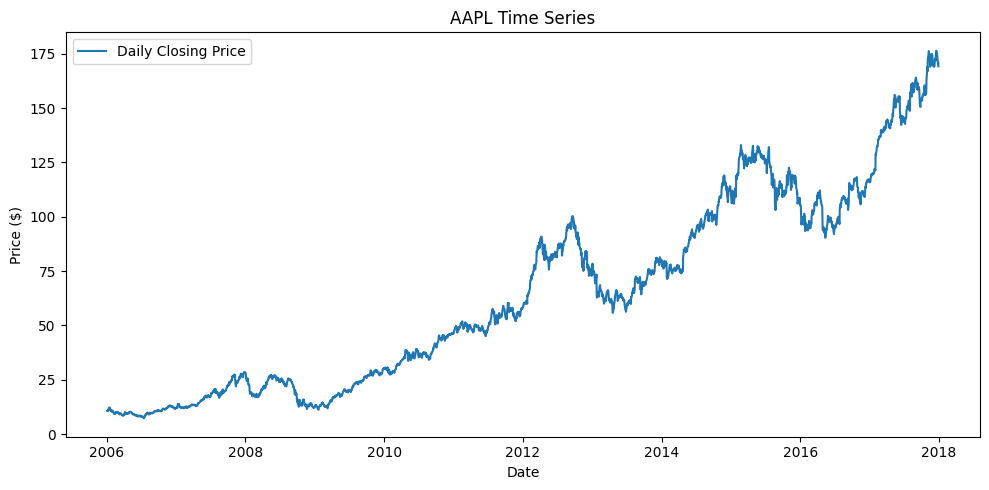

Basic exploratory summary:
count    3019.000000
mean       64.662892
std        44.536448
min         7.240000
25%        23.420000
50%        57.920000
75%        99.480000
max       176.420000
Name: Close, dtype: float64

Missing values: 0

Date range: 2006-01-03 00:00:00 to 2017-12-29 00:00:00


In [29]:
#DATA LOADING
data = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
display(data)
data = data.drop(columns=["Name"])

data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values("Date").set_index("Date")

ts = data["Close"].astype(float)

plt.figure(figsize=(10,5))
plt.plot(ts, label="Daily Closing Price")
plt.title("AAPL Time Series")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.tight_layout()
plt.show()

print("Basic exploratory summary:")
print(ts.describe())
print("\nMissing values:", ts.isna().sum())
print("\nDate range:", ts.index.min(), "to", ts.index.max())

In [30]:
# SPACING ANALYSIS

Spacing summary (time between consecutive observations):
count                         3018
mean     1 days 10:48:54.393638170
std      0 days 21:06:52.130048202
min                1 days 00:00:00
25%                1 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max                5 days 00:00:00
Name: Date, dtype: object

Unique spacing intervals:
Date
1 days    2366
3 days     545
4 days      77
2 days      27
5 days       3
Name: count, dtype: int64


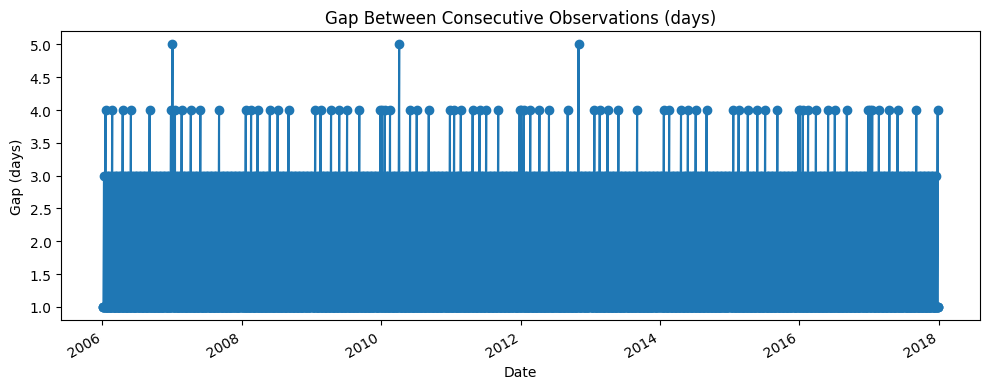


Irregular spacing detected: 652 irregular gaps out of 3018 total.
List of irregular gaps (first 10):
Date
2006-01-09   3 days
2006-01-17   4 days
2006-01-23   3 days
2006-01-30   3 days
2006-02-06   3 days
2006-02-13   3 days
2006-02-21   4 days
2006-02-27   3 days
2006-03-06   3 days
2006-03-13   3 days
Name: Date, dtype: timedelta64[ns]


In [31]:

diffs = data.index.to_series().diff().dropna()

print("Spacing summary (time between consecutive observations):")
print(diffs.describe())

unique_deltas = diffs.value_counts()
print("\nUnique spacing intervals:")
print(unique_deltas)

#plot the gaps
plt.figure(figsize=(10,4))
diffs.dt.days.plot(marker="o", linestyle="-")
plt.title("Gap Between Consecutive Observations (days)")
plt.xlabel("Date")
plt.ylabel("Gap (days)")
plt.tight_layout()
plt.show()

# regularity check
most_common_gap = diffs.mode()[0]
irregular = diffs[diffs != most_common_gap]

if irregular.empty:
    print(f"\nData are evenly spaced with a constant interval of {most_common_gap}.")
else:
    print(f"\nIrregular spacing detected: {len(irregular)} irregular gaps out of {len(diffs)} total.")
    print("List of irregular gaps (first 10):")
    print(irregular.head(10))


/var/folders/0r/_sk4sybx66q8hvt1f_qvjv1w0000gn/T/ipykernel_50074/3452049785.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_monthly = ts.resample("M").mean()


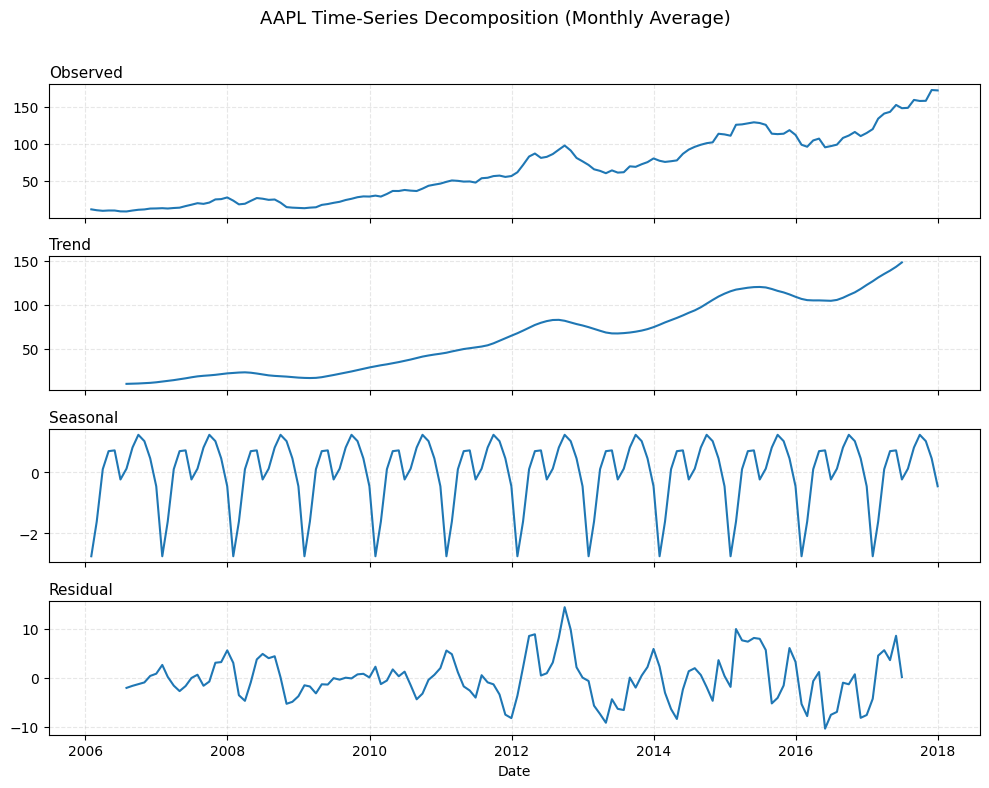

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts_monthly = ts.resample("M").mean()
result = seasonal_decompose(ts_monthly, model="additive", period=12)
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

components = {
    "Observed": result.observed,
    "Trend": result.trend,
    "Seasonal": result.seasonal,
    "Residual": result.resid
}

for ax, (title, series) in zip(axes, components.items()):
    ax.plot(series, label=title, color="tab:blue")
    ax.set_title(title, fontsize=11, loc="left", pad=5)
    ax.grid(True, linestyle="--", alpha=0.3)

axes[-1].set_xlabel("Date")
fig.suptitle("AAPL Time-Series Decomposition (Monthly Average)", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


<Figure size 1000x400 with 0 Axes>

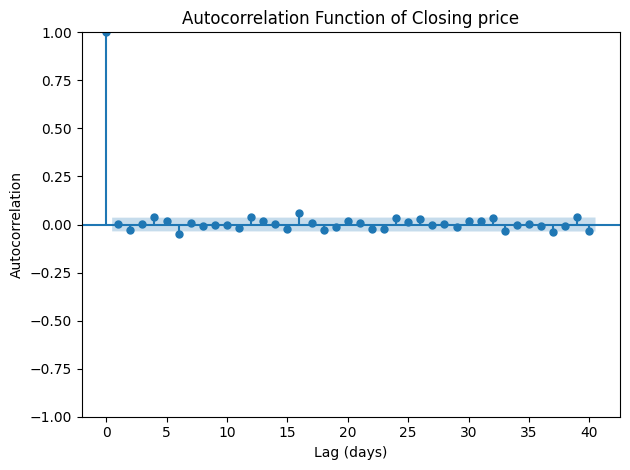

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

returns = ts.pct_change().dropna()

plt.figure(figsize=(10,4))
plot_acf(returns, lags=40)
plt.title("Autocorrelation Function of Closing price")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()